In [277]:
import pandas as pd
import os
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import DateOffset # To count back 275 months

import xgboost as xgb
from sklearn.metrics import mean_squared_error
import random

Zmienne:
- y: INDPRO
- x1: MGASUSGULF
- x2: GS30
- x3: ???
- x4: ???
- x5: ???

In [278]:
pwd = os.getcwd()
print(pwd)

dataset = pd.read_csv(pwd + "\\case.csv")
dataset.head()

c:\Users\Przemo\Desktop\PWC


,y,x1,x2,x3,x4,x5
0,NaN,2.456,4.00,1386.96,6.4,406426
1,104.7474,2.837,4.04,1462.59,4.4,405948
2,104.8129,2.578,3.56,1736.47,4.6,405466
3,104.4135,2.793,3.13,1688.85,18.0,403957
4,104.4852,3.283,3.10,1822.57,4.4,400415


In [279]:
len(dataset)

275

275 rows.  
22 years + 11 month = 275 months

In [280]:
# def create_date_table2(start='2000-01-01', end='2050-12-31'):
#          df = pd.DataFrame({"Date": pd.date_range(start, end)})
#          df["Day"] = df.Date.dt.weekday
#          df["Quarter"] = df.Date.dt.quarter
#          df["Year"] = df.Date.dt.year
#          df["Year_half"] = (df.Quarter + 1) // 2
#          return df

In [281]:
dt.datetime(2023, 1, 29)

datetime.datetime(2023, 1, 29, 0, 0)

In [282]:
start_date = dt.datetime(2023, 1, 29) - DateOffset(months= len(dataset))
start_date

Timestamp('2000-02-29 00:00:00')

In [283]:
def create_date_table(start='2000-01-01', end='2050-12-31'):
         df = pd.DataFrame({"Date": pd.date_range(start, end, freq="M")})
         return df

In [284]:
calendar_df = create_date_table(start= start_date, end= dt.datetime.now())
calendar_df

,Date
0,2000-02-29
1,2000-03-31
2,2000-04-30
3,2000-05-31
4,2000-06-30
...,...
270,2022-08-31
271,2022-09-30
272,2022-10-31
273,2022-11-30


In [285]:
# calendar_df['month'] = calendar_df['Date'].dt.month
# calendar_df['year'] = calendar_df['Date'].dt.year
# calendar_df['year']

In [286]:
dataset.isnull().sum()

y     1
x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

In [287]:
#dataset['Date'] = calendar_df['Date']
dataset.index = calendar_df['Date']
dataset = dataset.loc[dataset['y'].notna()]
dataset


,y,x1,x2,x3,x4,x5
Date,,,,,,
2000-03-31,104.7474,2.837,4.04,1462.59,4.4,405948
2000-04-30,104.8129,2.578,3.56,1736.47,4.6,405466
2000-05-31,104.4135,2.793,3.13,1688.85,18.0,403957
2000-06-30,104.4852,3.283,3.10,1822.57,4.4,400415
2000-07-31,103.9464,4.049,3.25,1824.05,11.7,394222
...,...,...,...,...,...,...
2022-08-31,93.1620,0.896,6.15,2209.90,20.9,117295
2022-09-30,92.8872,0.732,5.85,2391.20,14.7,116631
2022-10-31,92.3118,0.857,6.05,1946.30,19.4,115932


In [288]:
# plt.rcdefaults() # before executing this function all plate 

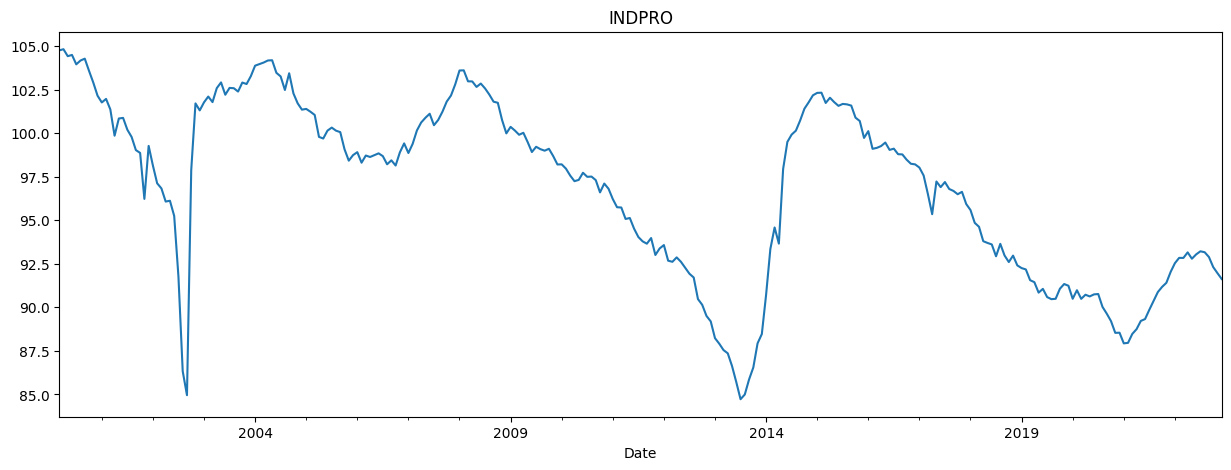

In [289]:
fig, ax = plt.subplots(figsize = (15, 5))
dataset['y'].plot(ax=ax, label = "Train", title="INDPRO")
plt.show()

# Creating 2 Models
- Spliting sorted dataset on particular date (split date have been chosen to split dataset in 80/20 ratio)
- Spliting dataset by selection 80% random rows

# Sorted Model
### Train / Test Split
- 80% form 275 months is 220 months for train
- 20% form 275 is 55 months for te

In [290]:
split_date = dt.datetime(2023, 1, 29) - DateOffset(months= 55)

train = dataset.loc[dataset.index < split_date]
test = dataset.loc[dataset.index >= split_date]

In [291]:
train.isnull().sum()

y     0
x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

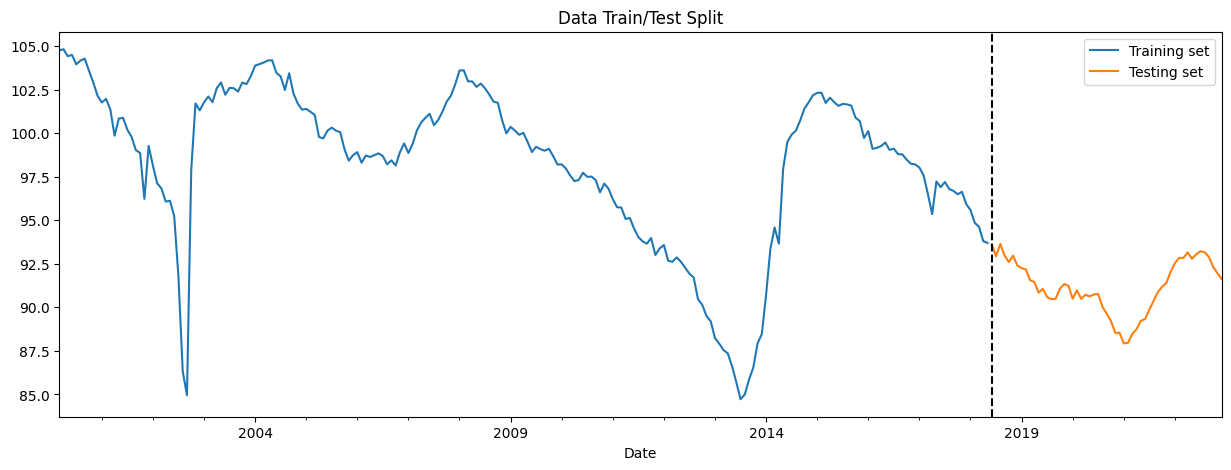

In [292]:
fig, ax = plt.subplots(figsize = (15, 5))
train['y'].plot(ax=ax, label = "Train", title="Data Train/Test Split")
test['y'].plot(ax=ax, label = "Test")
ax.axvline(split_date, color = 'black', ls ='--')
ax.legend(["Training set", 'Testing set'])
plt.show()

In [293]:
dataset.columns

Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

In [294]:
FEATURES = ['x1', 'x2', 'x3', 'x4', 'x5']
TARGET = 'y'

In [295]:
X_train = train[FEATURES]
Y_train = train[TARGET]

X_test = test[FEATURES]
Y_test = test[TARGET]

In [327]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)

reg.fit(X_train, Y_train,
        eval_set = [(X_train, Y_train), (X_test, Y_test)],
        verbose= 10)

[0]	validation_0-rmse:68.73064	validation_1-rmse:61.52023
[10]	validation_0-rmse:2.39029	validation_1-rmse:4.49314
[20]	validation_0-rmse:0.31834	validation_1-rmse:3.21718
[30]	validation_0-rmse:0.17249	validation_1-rmse:3.21892
[40]	validation_0-rmse:0.08039	validation_1-rmse:3.24448
[50]	validation_0-rmse:0.04311	validation_1-rmse:3.26082
[60]	validation_0-rmse:0.02556	validation_1-rmse:3.28967
[70]	validation_0-rmse:0.01518	validation_1-rmse:3.30070


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [301]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                        learning_rate = 0.01)

reg.fit(X_train, Y_train,
        eval_set = [(X_train, Y_train), (X_test, Y_test)],
        verbose= 100)

[0]	validation_0-rmse:96.91676	validation_1-rmse:89.74330
[100]	validation_0-rmse:35.87575	validation_1-rmse:28.60200
[200]	validation_0-rmse:13.49464	validation_1-rmse:11.01353
[300]	validation_0-rmse:5.20949	validation_1-rmse:5.42639
[400]	validation_0-rmse:2.10457	validation_1-rmse:3.91579
[500]	validation_0-rmse:0.91789	validation_1-rmse:3.27057
[600]	validation_0-rmse:0.45862	validation_1-rmse:3.02816
[700]	validation_0-rmse:0.28199	validation_1-rmse:2.91828
[800]	validation_0-rmse:0.21657	validation_1-rmse:2.88150
[835]	validation_0-rmse:0.20088	validation_1-rmse:2.89504


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [302]:
feature_importance = pd.DataFrame(
    data = reg.feature_importances_,
    index = reg.feature_names_in_,
    columns=['importance'])

feature_importance.sort_values('importance')

,importance
x4,0.093145
x1,0.143978
x2,0.187928
x3,0.282305
x5,0.292644


<AxesSubplot: title={'center': 'Importance of features'}>

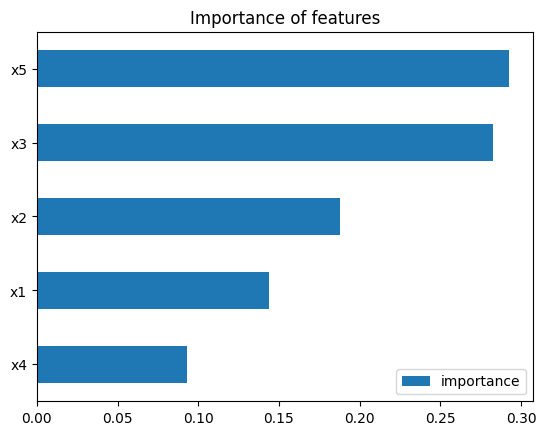

In [303]:
importance_plot = feature_importance.sort_values('importance').plot(kind='barh', title="Importance of features")
importance_plot

# Forecast on Test

In [304]:
test['predict'] = reg.predict(X_test)
test.head()

C:\Users\Przemo\AppData\Local\Temp\ipykernel_2032\4064557642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict'] = reg.predict(X_test)


,y,x1,x2,x3,x4,x5,predict
Date,,,,,,,
2018-06-30,93.6109,1.233,5.31,1682.45,26.5,181078,92.941879
2018-07-31,92.9303,1.171,5.48,1767.60,20.5,178224,92.966484
2018-08-31,93.6446,1.335,5.51,1761.47,22.6,175634,93.053970
2018-09-30,92.9761,1.149,5.28,1783.13,26.9,173338,92.394775
2018-10-31,92.6000,1.090,4.90,1653.72,20.1,171376,91.939735


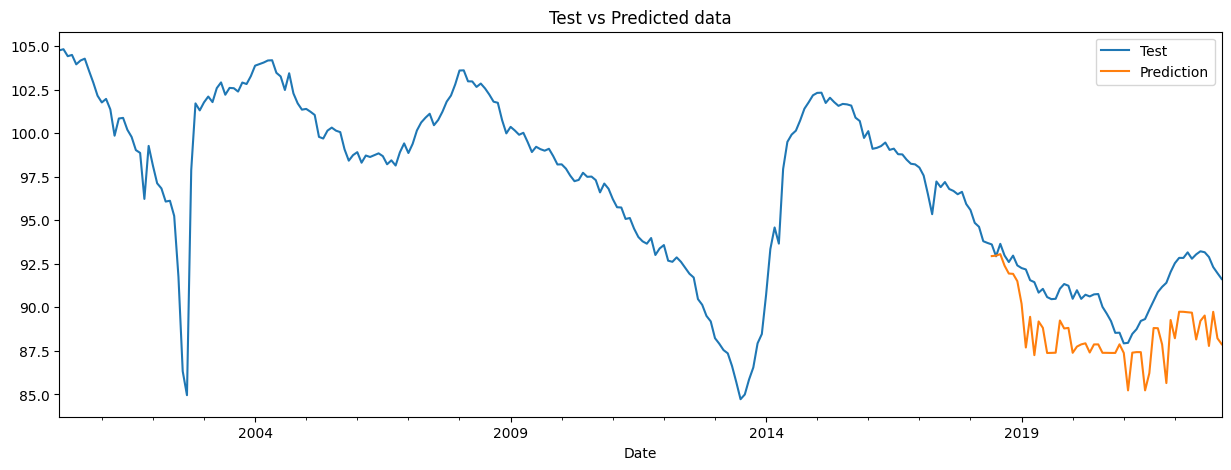

In [305]:
fig, ax = plt.subplots(figsize = (15, 5))
dataset['y'].plot(ax=ax, label = "Test", title="Test vs Predicted data")
test['predict'].plot(ax=ax, label = "predict")
plt.legend(["Test", "Prediction"])
plt.show()

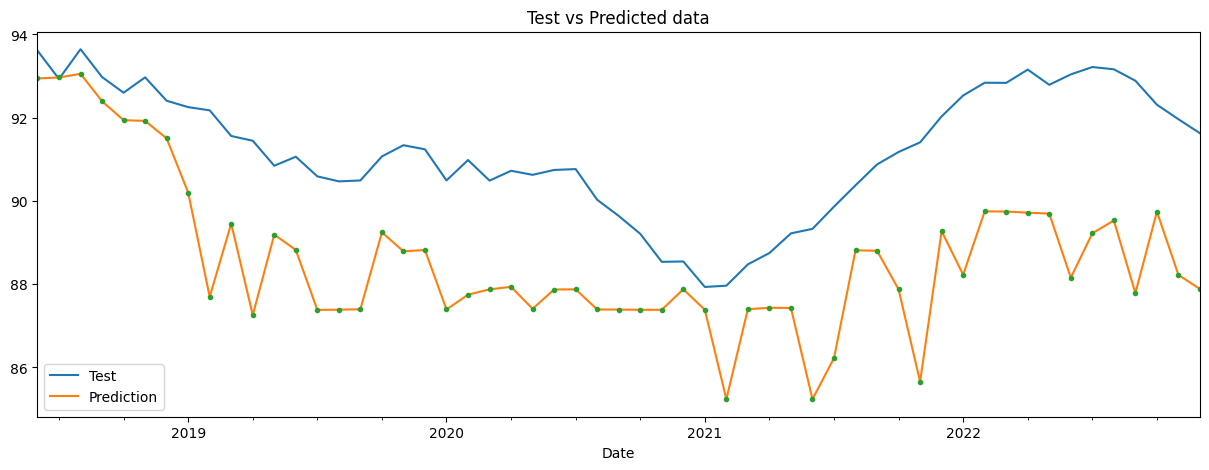

In [306]:
fig, ax = plt.subplots(figsize = (15, 5))
test['y'].plot(ax=ax, label = "Test", title="Test vs Predicted data")
test['predict'].plot(ax=ax, label = "predict")
test['predict'].plot(ax=ax, style=".", label = "predict")
plt.legend(["Test", "Prediction"])
plt.show()

In [307]:
score = np.sqrt(mean_squared_error(test[TARGET], test['predict']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 2.88


# Calculate error
-best and worst predictions

In [308]:
test['error'] = np.abs(test[TARGET] - test['predict'])

C:\Users\Przemo\AppData\Local\Temp\ipykernel_2032\680902911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error'] = np.abs(test[TARGET] - test['predict'])


In [309]:
# Worst predictions
test.sort_values('error', ascending=False).head(5)

,y,x1,x2,x3,x4,x5,predict,error
Date,,,,,,,,
2021-11-30,91.4079,0.816,5.45,1794.65,-6.2,123719,85.654549,5.753351
2022-09-30,92.8872,0.732,5.85,2391.20,14.7,116631,87.784752,5.102448
2022-06-30,93.0400,0.829,5.85,2092.80,25.2,118606,88.155678,4.884322
2019-02-28,92.1763,0.820,5.25,1480.11,18.0,164933,87.696129,4.480171
2022-01-31,92.5334,0.720,5.49,1648.30,26.1,122150,88.226646,4.306754


In [310]:
# Best predictions
test.sort_values('error', ascending=True).head(5)

,y,x1,x2,x3,x4,x5,predict,error
Date,,,,,,,,
2018-07-31,92.9303,1.171,5.48,1767.60,20.5,178224,92.966484,0.036184
2021-01-31,87.9329,0.508,5.48,1223.77,11.2,134172,87.384193,0.548707
2018-09-30,92.9761,1.149,5.28,1783.13,26.9,173338,92.394775,0.581325
2018-08-31,93.6446,1.335,5.51,1761.47,22.6,175634,93.053970,0.590630
2018-10-31,92.6000,1.090,4.90,1653.72,20.1,171376,91.939735,0.660265


# Random Selected rows model


In [311]:
# Selecting 80% of row 
train_random = dataset.sample(frac= 0.8)

# Selecting remaining 20% of rows
test_random = dataset.drop(train_random.index)

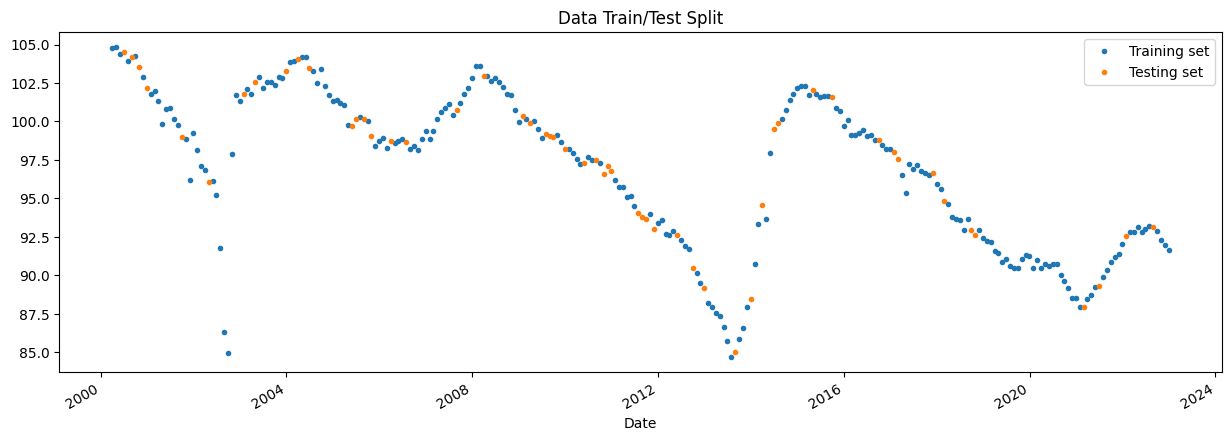

In [312]:
fig, ax = plt.subplots(figsize = (15, 5))
train_random['y'].plot(ax=ax, style=".", label = "Train", title="Data Train/Test Split")
test_random['y'].plot(ax=ax, style=".", label = "Test")
ax.legend(["Training set", 'Testing set'])
plt.show()

In [313]:
FEATURES = ['x1', 'x2', 'x3', 'x4', 'x5']
TARGET = 'y'
X_train_random = train_random[FEATURES]
Y_train_random = train_random[TARGET]

X_test_random = test_random[FEATURES]
Y_test_random = test_random[TARGET]

In [314]:
reg_random = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                                learning_rate = 0.01)

reg_random.fit(X_train_random, Y_train_random,
        eval_set = [(X_train_random, Y_train_random), (X_test_random, Y_test_random)],
        verbose = 100)

[0]	validation_0-rmse:95.40089	validation_1-rmse:96.06996
[100]	validation_0-rmse:35.35835	validation_1-rmse:35.95079
[200]	validation_0-rmse:13.30260	validation_1-rmse:13.66936
[300]	validation_0-rmse:5.15369	validation_1-rmse:5.59436
[400]	validation_0-rmse:2.10907	validation_1-rmse:2.73826
[500]	validation_0-rmse:0.94885	validation_1-rmse:1.80874
[600]	validation_0-rmse:0.50816	validation_1-rmse:1.52328
[700]	validation_0-rmse:0.33467	validation_1-rmse:1.43932
[800]	validation_0-rmse:0.25181	validation_1-rmse:1.40904
[900]	validation_0-rmse:0.20257	validation_1-rmse:1.39789
[999]	validation_0-rmse:0.16444	validation_1-rmse:1.39341


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [315]:
feature_importance_random = pd.DataFrame(
    data = reg_random.feature_importances_,
    index = reg_random.feature_names_in_,
    columns=['importance'])

feature_importance_random.sort_values('importance')

,importance
x4,0.081937
x1,0.099036
x3,0.199448
x2,0.270724
x5,0.348855


<AxesSubplot: title={'center': 'Importance of features'}>

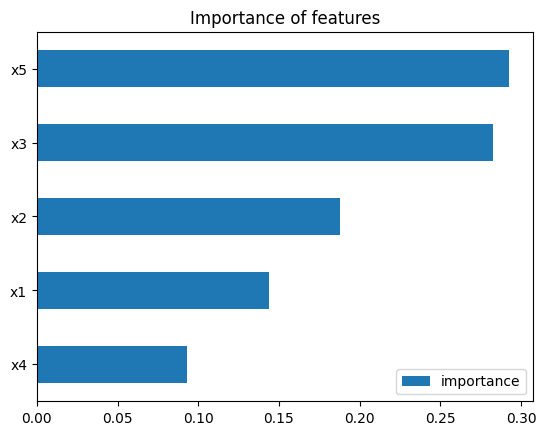

In [316]:
importance_plot_random = feature_importance.sort_values('importance').plot(kind='barh', title="Importance of features")
importance_plot_random

# Forecasting of reg_random model

In [317]:
test_random['predict'] = reg_random.predict(X_test_random)
test_random.head()

,y,x1,x2,x3,x4,x5,predict
Date,,,,,,,
2000-06-30,104.4852,3.283,3.10,1822.57,4.4,400415,104.429909
2000-08-31,104.1646,3.750,3.07,2164.81,9.6,385212,102.790939
2000-10-31,103.5717,3.197,2.41,2224.28,24.8,363887,100.425858
2000-12-31,102.1460,2.400,2.10,2217.18,26.2,346327,101.516434
2001-09-30,99.0246,1.958,2.30,1949.57,36.7,281370,99.294708


In [318]:
score_random = np.sqrt(mean_squared_error(test_random[TARGET], test_random['predict']))
print(f'RMSE Score on Test set: {score_random:0.2f}')

RMSE Score on Test set: 1.39


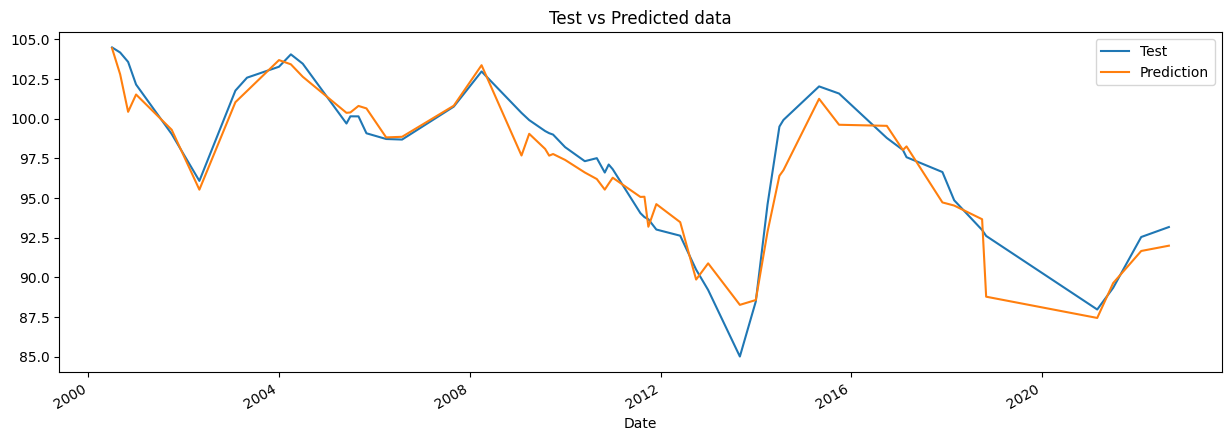

In [325]:
fig, ax = plt.subplots(figsize = (15, 5))
test_random['y'].plot(ax=ax, label = "Test", title="Test vs Predicted data")
test_random['predict'].plot(ax=ax, label = "predict")
plt.legend(["Test", "Prediction", "Prediction_random"])
plt.show()

### Predicting data on sorted test set

In [330]:
test['predict_random'] = reg_random.predict(X_test)
test.head(3)

C:\Users\Przemo\AppData\Local\Temp\ipykernel_2032\4034921342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predict_random'] = reg_random.predict(X_test)


,y,x1,x2,x3,x4,x5,predict,error,predict_random
Date,,,,,,,,,
2018-06-30,93.6109,1.233,5.31,1682.45,26.5,181078,92.941879,0.669021,93.663261
2018-07-31,92.9303,1.171,5.48,1767.60,20.5,178224,92.966484,0.036184,93.102043
2018-08-31,93.6446,1.335,5.51,1761.47,22.6,175634,93.053970,0.590630,93.729919


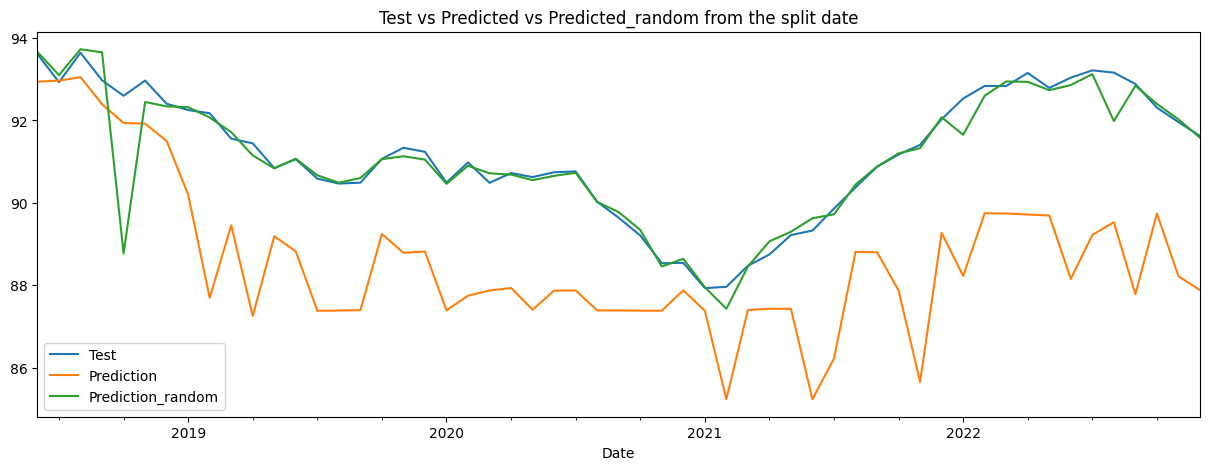

In [328]:
fig, ax = plt.subplots(figsize = (15, 5))
test['y'].plot(ax=ax, label = "Test", title="Test vs Predicted vs Predicted_random from the split date")
test['predict'].plot(ax=ax, label = "predict")
test['predict_random'].plot(ax=ax, label = "predict_random")
plt.legend(["Test", "Prediction", "Prediction_random"])
plt.show()

# Comparision
## RMSE = Root Mean Square Error  
### Sorted by date model
- RMSE Score on Test set: 2.88
### Random selected model
- RMSE Score on Test set: 1.39


# Corelation Matrix

In [197]:
dataset_corr = dataset.drop(columns='y')
dataset_corr = dataset_corr.corr()
dataset_corr

,x1,x2,x3,x4,x5
x1,1.000000,-0.326310,0.595855,0.018548,0.296016
x2,-0.326310,1.000000,-0.093061,-0.260306,-0.454749
x3,0.595855,-0.093061,1.000000,0.123368,0.276533
x4,0.018548,-0.260306,0.123368,1.000000,0.264020
x5,0.296016,-0.454749,0.276533,0.264020,1.000000


<AxesSubplot: >

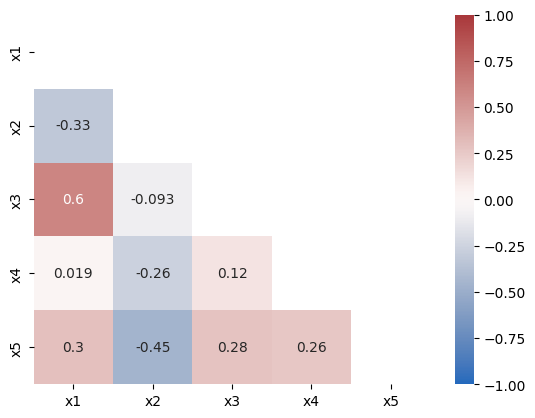

In [201]:
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
sns.heatmap(dataset_corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)